In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 42)


# stratify 옵션
# stratify = cancer.target 층화추출; y값에 따라서 비율을 조절해주세용


tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train))) # 얼마만큼 원데이터와 오차가 있는지 fitting률 확인
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))


# 훈련 세트 정확도가 100% 가깝쥬..?
# 훈련 세트 정확도가 높아서 오버피팅 가능성이 있음.

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [3]:
# 튜닝에 욕심난다 => #가지치기 !!  * 마지막 노드의 불순도가 0가 되어야 함
# 사전 가지치기

tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)


print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train))) 
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))


## fitting률은 중요치 않다. 낮추더라도 테스트 세트 수치를 올리는 것이 어큐러시가 정확한 것!

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [15]:
cancer['DESCR']

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [4]:
# 파라미터 값 확인_ for 튜닝

tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot", class_names = ["악성", "양성"],
                feature_names = cancer.feature_names, impurity = False, filled = True)


# 확장자명: tree.dot

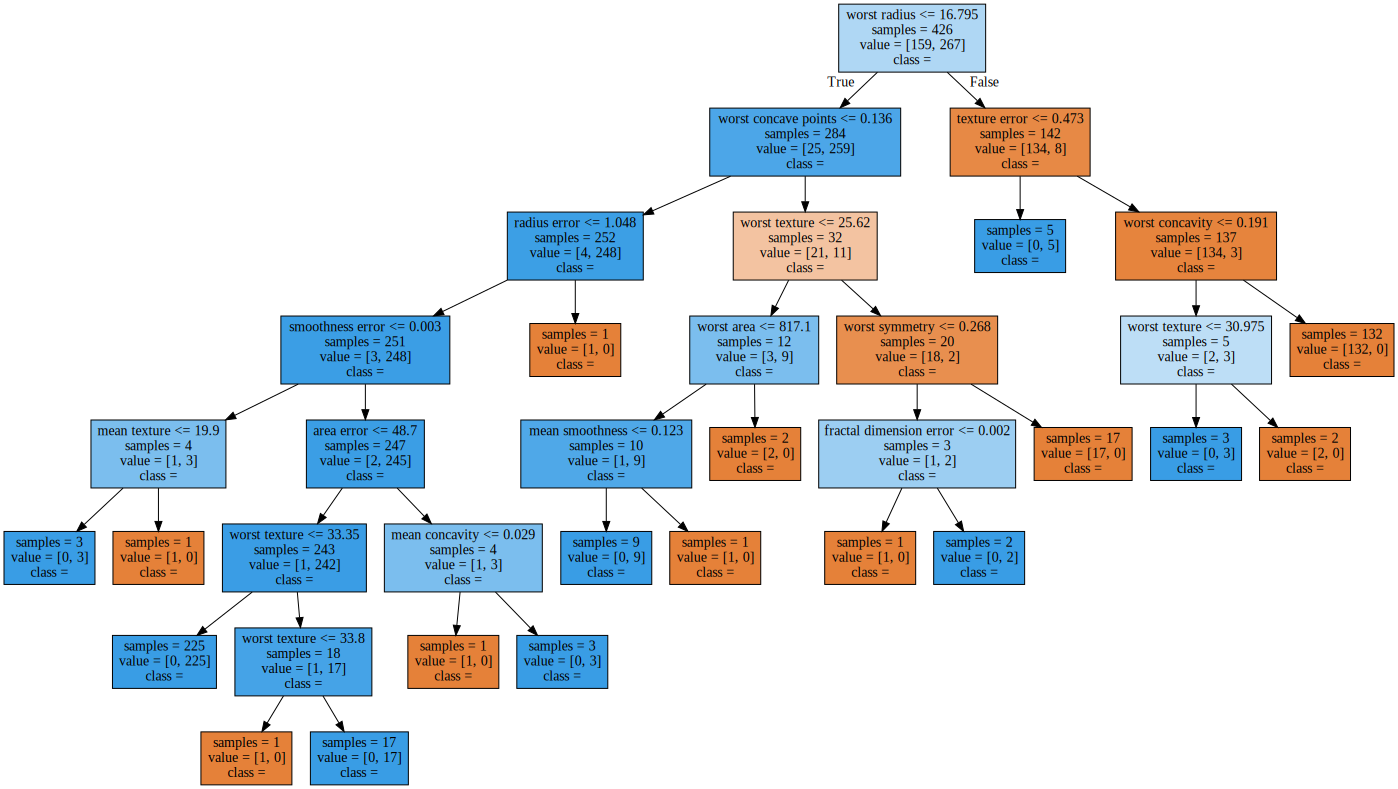

In [11]:
import graphviz

with open("tree.dot", encoding = "utf-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [12]:
tree.feature_importances_      

array([0.        , 0.00752597, 0.        , 0.        , 0.00903116,
       0.        , 0.00752597, 0.        , 0.        , 0.        ,
       0.00975731, 0.04630969, 0.        , 0.00238745, 0.00231135,
       0.        , 0.        , 0.        , 0.        , 0.00668975,
       0.69546322, 0.05383211, 0.        , 0.01354675, 0.        ,
       0.        , 0.01740312, 0.11684357, 0.01137258, 0.        ])

In [16]:
cancer['DESCR']


# 0: 한번도 사용된 적 없는 속성(피쳐!)
# 1: 이 속성 한번에 100% 분류됨!

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

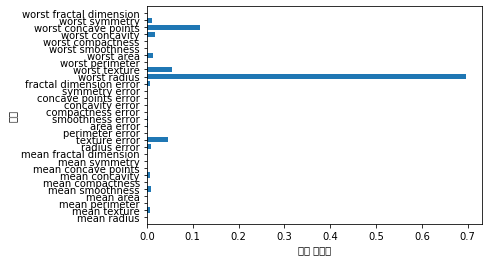

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='NanumBarunGothic')
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')  # h: 수평bar
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

plt.barh*수평바(np.arange*numpy배열 (n_features), model.feature_importances_* 중요한거 y축, align='center')

Text(0, 0.5, '가격 ($/Mbyte)')

C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 45380 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44201 mis

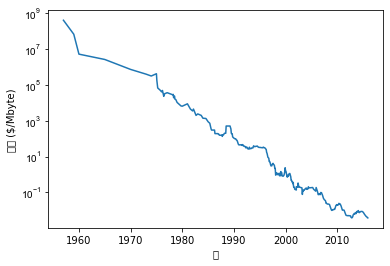

In [23]:
import os
import mglearn
import pandas as pd
import matplotlib.pyplot as plt

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [24]:
ram_prices

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
328,328,2015.58,4.500000e-03
329,329,2015.67,4.300000e-03
330,330,2015.75,4.200000e-03
331,331,2015.83,3.800000e-03


In [32]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)  # 지수함수
price_lr = np.exp(pred_lr)

NameError: name 'LinearRegression' is not defined

In [35]:
# 앙상블 (의사결정트리 보완)  *뭐가 좋다고는 할 수는 없지만 밑에 보면 다른 피쳐들을 살려줌
# 랜덤 포레스트
# EDA에 많이 씀

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
y

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(random_state=2)
forest.fit(X_train, y_train)

C:\Users\student\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

n_estimators=5  트리개수

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-

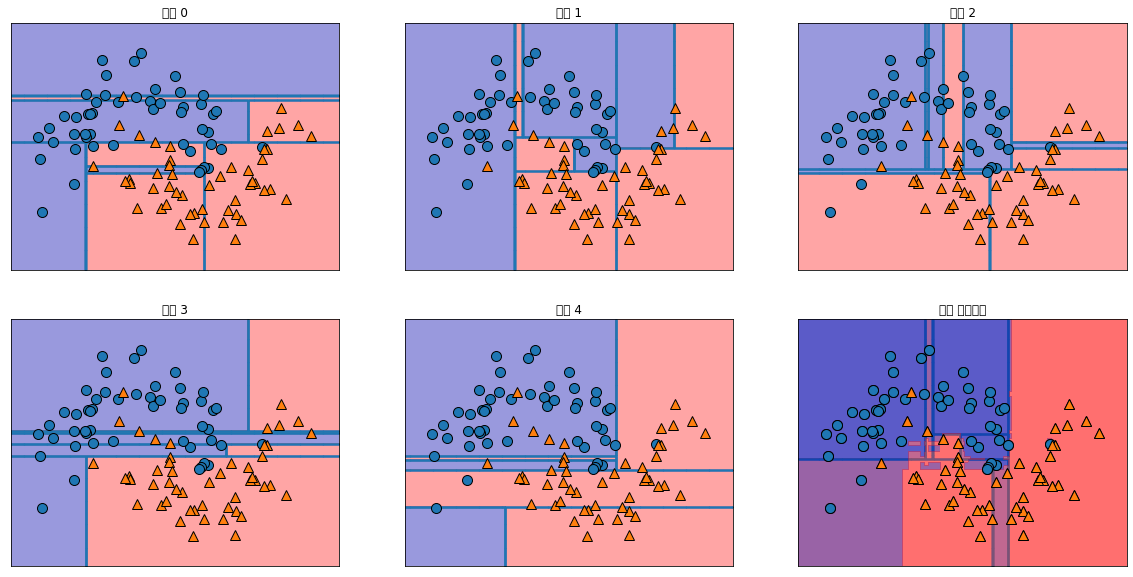

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 mi

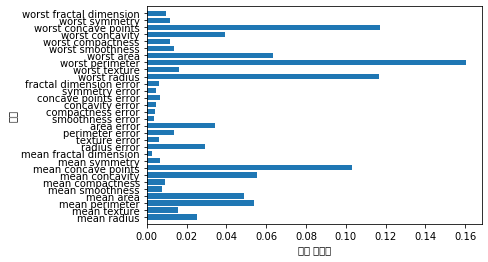

In [42]:
plot_feature_importances_cancer(forest)

fig, axes = plt.subplots(2, 3 *2행 3열*, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [43]:
forest.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=209652396, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=398764591, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                   

In [44]:
axes.ravel

<function ndarray.ravel>

In [45]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7D124A388>,
      dtype=object)